# 군집화를 통한 labeling

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN


df = pd.read_csv('./data.csv',encoding = 'euc-kr')
df.columns = ['singer']+[x for x in range(len(df.columns)-1)]
name = df['singer']
del df['singer']


C:\Users\wnduq\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

## DBSCAN

In [201]:

#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=2) #기본값이다.
cluster = dbscan.fit_predict(scaled_X)
df["cluster"] = cluster
print(df)
df["cluster"] ==0

           0         1            2            3            4         5  \
0   0.087899  0.280169  2534.790697  2904.770676  5684.640819  0.162009   
1   0.065381  0.296746  2565.032392  2865.257192  5705.283739  0.137256   
2   0.084984  0.371052  2608.097412  2678.245093  5502.740167  0.127039   
3   0.062461  0.287018  2189.302060  1809.739923  3768.235663  0.068128   
4   0.089077  0.356594  2584.902250  2643.195400  5475.790382  0.124723   
..       ...       ...          ...          ...          ...       ...   
70  0.123169  0.296088  2315.852747  2294.206654  4463.954486  0.107025   
71  0.018961  0.270936  2170.670314  1878.827955  3684.915147  0.075594   
72  0.028781  0.283676  2398.232614  2119.267010  4386.366727  0.086382   
73  0.155281  0.246570  2259.120650  2017.276503  3924.384668  0.083432   
74  0.040036  0.290738  2976.754120  3368.713926  6972.447844  0.144663   

             6          7          8          9  ...        17         18  \
0  -267.040491  39.448

0     True
1     True
2     True
3     True
4     True
      ... 
70    True
71    True
72    True
73    True
74    True
Name: cluster, Length: 75, dtype: bool

## K-MEANS

### Scree plot

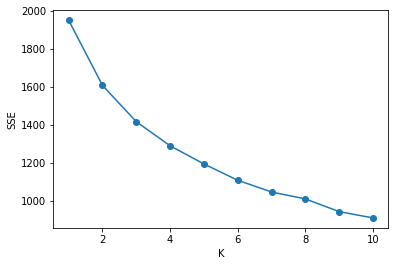

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.savefig('fig.png', dpi=300)
    plt.show()
    

elbow(scaled_X)


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 7
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

    predict
0         5
1         2
2         5
3         4
4         2
..      ...
70        2
71        4
72        4
73        2
74        1

[75 rows x 1 columns]
1번째 군집은 5개
2번째 군집은 8개
3번째 군집은 13개
4번째 군집은 5개
5번째 군집은 17개
6번째 군집은 15개
7번째 군집은 12개


## Ploting by PCA 

         pc1       pc2  singer cluster
0   -5.00044  0.244963    10cm       f
1    -2.2684  -2.05014    Buzz       c
2   -1.29553  -1.54206  CHEEZE       f
3    2.16193  0.126657   Crush       e
4   -1.19175 -0.731243  K.Will       c
..       ...       ...     ...     ...
70 -0.757166   3.42455     하현우       c
71   2.88495  0.503815     현진영       e
72   1.78706 -0.768938     황인욱       e
73 -0.144528   4.47254      휘성       c
74  -3.12563  -2.94923      휘인       b

[75 rows x 4 columns]


C:\Users\wnduq\Anaconda3\envs\cuda\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,pc1,pc2,singer,cluster
16,6.01572,3.82982,김필,d
36,1.66557,2.44401,소향,d
46,5.81882,5.71579,윤미래,d
61,3.548,2.64887,조장혁,d
67,2.52382,3.3261,테이,d


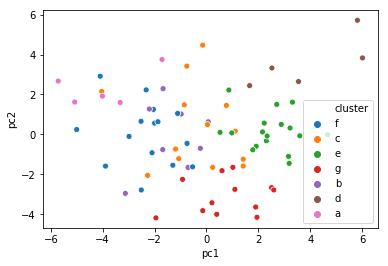

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,name, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
plt.savefig('fig3.png', dpi=300)
df[df['cluster']=='d']

## 3차원에서 보았을 떄

         pc1       pc2       pc3  singer cluster
0   -5.00044  0.244963  -1.00518    10cm       f
1    -2.2684  -2.05014   3.88694    Buzz       c
2   -1.29553  -1.54206  -2.65023  CHEEZE       f
3    2.16193  0.126657   1.64045   Crush       e
4   -1.19175 -0.731243    1.4497  K.Will       c
..       ...       ...       ...     ...     ...
70 -0.757166   3.42455   1.39774     하현우       c
71   2.88495  0.503815 -0.348881     현진영       e
72   1.78706 -0.768938  0.350265     황인욱       e
73 -0.144528   4.47254    2.6997      휘성       c
74  -3.12563  -2.94923   0.61235      휘인       b

[75 rows x 5 columns]


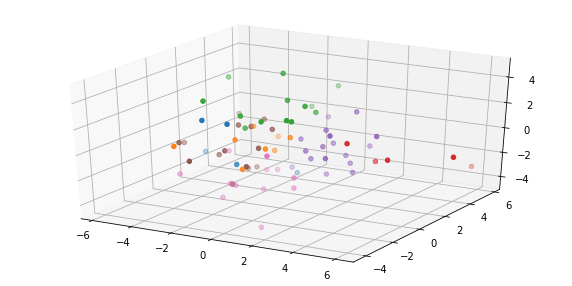

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,name, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','pc3','singer','cluster'])
print(df)

#polting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') 

for i in string:
    temp = df[df['cluster'] ==i] 
    ax.scatter(temp['pc1'],temp['pc2'],temp['pc3'])
plt.savefig('fig4.png', dpi=300)




데이터 더 모아야 할듯...

## 정규난수와 비교

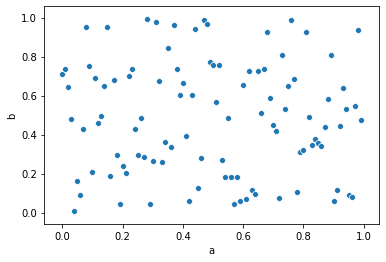

In [179]:
import random
arr= []
idx = []
for i in range(100):
    arr.append(random.random())
    idx.append(i/100)
    
idx = pd.DataFrame(idx)
arr = pd.DataFrame(arr)
data=pd.concat([idx, arr],axis=1)
data.columns = ['a','b']
sns.scatterplot(x = data['a'],y = data['b'])